# Python and NLP for Linguists
I'm going to try something novel: giving this talk from a Jupyter notebook so I can run code on the fly.

While I was writing up this notebook, this talk turned into a broad introduction to NLP as well as Python.  Oh well.

## Who is this guy?
* Henry Anderson ([henry.anderson@uta.edu](mailto:henry.anderson@uta.edu))
* Data Scientist in the University Analytics department
* Specialist in unstructured data (i.e., text), machine learning, and Natural Language Processing
* First year masters student, with interests in computational social science, digital language use, and the language of online communities and networks.

## Contents
* Who stands to gain the most
* Why consider _programming,_ generally?
* Why consider _Python,_ specifically?
* Some demos:
  * Custom concordance code, with massive flexibility
  * Quick n-gram analysis
  * Automatic dependency parsing, POS-tagging, lemmatization, tokenization, etc. (i.e., text preprocessing)
  * Topic models
  * Word vectors
  * Classification and regression tasks with text

## Goals of this talk
* Put some basic computational/programming tools on your radar.
* Give a sense of what _type_ of work can be done with these tools.
* Make you generally aware of the scope and nature of computational tools.
* Give some _very_ basic exposure to Python.
  * We'll walk through some very basic code examples, but we'll skim over most of them.

## This talk is _not..._
* A tutorial on Python, the dataset, or the libraries.
  * That can come later, if people are interested.
* A tutorial in natural language processing, text processing, or big data.
* Really a tutorial in anything.

## Who this talk is for
* Anyone who deals with _data:_ people interested in corpus work, sociolinguistics, natural language processing, digital/online language, etc.
* Anyone interested in _computational social science_ (CSS): i.e. general social science approaches leveraging large datasets and computational horsepower.
  * CSS is currently exploding, and is a hugely important avenue for applied social science research.
  * CSS is also massively interdisciplinary: programming, statistics, machine learning, AI, network analysis, linguistics, sociology, psychology, etc all combine to make CSS happen.
* If you deal mostly with theory, or are primarily an experimentalist, you may stand to gain less from this talk.  (But you're still welcome!)

## What does programming offer?
* (Quite literally) infinite control over your data processing: you're not limited by the features someone else decided to code into their program--you can change your code up to do anything you want.
* Scalability and automation of your data work
  * Work with literally millions of documents and billions of words with relative ease.
  * Automate steps from data collection through final analysis.
* Marketable skills: even a little bit of Python, Java, or any other language can open doors in the job market.
* You'll feel like a badass.

## What does _Python_ offer?
* Free (as in speech, not beer.  But also as in beer), open-source, royalty-free.  No licenses to sign, no royalties to pay, and _essentially no restrictions_ on what you can and can't do with it.  (the [Python Software Foundation license](https://docs.python.org/3/license.html) is an extremely permissive BSD-type license)

* Huge userbase that's big into Open Source and Free Software--so it's easy to find help or sample code.

* Rapidly becoming _the_ language for data science, displacing even R in most applications.  (R is still dominant for raw statistics, though Python has plenty of packages that implement common statistical tests).
  * Though, keep an eye on a different language--Julia--over the next few years.  It is truly a worthy contender, but has yet to hit version 1.0 as of this talk.

* Easy-to-learn language.
  * Great documentation and stupid amounts of free, high-quality learning resources.
  * Among its core ideas:
    * Code is read far more than it is written, so the language should be _human-readable._
    * "There should be one, and preferably only one, obvious way to do it."  I.e., the most straightforward approach is _usually_ the best.  (This results in a lot of people writing straightforward, fairly easy-to-follow code).
  * Commonly taught as a first programming language, so there are LOTS of materials for eveyone from beginning programmers to seasoned professionals; the Python community is also very welcoming of newcomers.

* General purpose language: can do (almost) everything you want to make it to.
  * Compare to R, which is great for statistics, and a pain for a lot of other stuff.
  * Or Matlab, which is great for being a broken, slow, difficult software environment, and isn't so good at being, well, good.
    * (this has been your mandatory "Matlab is bad" comment)
    
* Very well-developed and actively maintained libraries, often with at most minor overlap: usually if you want to do some specific task, there's a single library that does it well.

* **For linguists**: a _huge_ array of language processing functionality and libraries.
  * [spaCy](https://spacy.io), basically a Python version of Stanford's CoreNLP toolkit (lemmatization, tokenization, dependency parsing, POS tagging, and more).
  * [Gensim](https://radimrehurek.com/gensim/), full of topic models and pretty bleeding-edge NLP tools.
  * [Natural Language Toolkit (NLTK)](http://www.nltk.org/), a _massive_ library that's designed to teach a lot of NLP concepts (but can be used for some serious production work too).
  * [Pandas](http://pandas.pydata.org/) for R-like dataframes, statistics, and general tabular data management.
  * [Matplotlib](https://matplotlib.org/) (and others like [Seaborn](https://seaborn.pydata.org/), [PyGal](http://www.pygal.org/en/stable/), [Bokeh](https://bokeh.pydata.org/en/latest/), ...) for high-quality, powerful data visualization.
  * [scikit-learn](http://scikit-learn.org/stable/index.html) for non-neural machine learning (support vector machines, random forests, and a few text features like basic preprocessing)
    * Side note, the scikit-learn [User Guides](http://scikit-learn.org/stable/user_guide.html) are an _excellent_ technical crash course in machine learning, even if you're not too interested in Python.
  * [Networkx](https://networkx.github.io/) for performing network analysis.
  * [Tensorflow](https://www.tensorflow.org/)+[Keras](https://keras.io/), for quickly and easily building neural networks.
  * [PyTorch](http://pytorch.org/), an up-and-coming (but extremely exciting) neural network library.
  * And dozens more.

# Running this notebook

To run this notebook, you will need to install the following Python libraries:
* Jupyter (to run/view the notebook itself)
* Gensim
* spaCy
  * You'll need to download two of spaCy's language models: `en_core_web_sm` and `en_core_web_lg`.  Installation instructions are [here.](https://spacy.io/models/)
* Numpy
* Scikit-learn (goes by sklearn when installing)
* Matplotlib
* Natural Language Toolkit (NLTK)
* tqdm
* Pandas

For the second part of the talk, you'll need to download the [Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm) and unzip its files into a folder named "blogs" (case-sensitive) in the same folder as this notebook.

# Some basic demos

First, some necessary setup--we just need to have this program create some folders to save stuff into.

In [1]:
import os

if not os.path.isdir("corpus data files"):
    os.mkdir("corpus data files")
if not os.path.isdir("topic models"):
    os.mkdir("topic models")

## Concordances

Concordances can be done with regular expressions and a teeny tiny bit of legwork.  (By the way: if you're working with text, you have no excuse to not learn regular expressions.  But that would be another talk all unto itself).  We'll work with the text of William Hope Hodgeson's novel [_The Boats of the "Glen Carrig"_](https://en.wikipedia.org/wiki/The_Boats_of_the_%22Glen_Carrig%22), a 1907 horror novel.  The text was taken [from Project Gutenberg](http://www.gutenberg.org/ebooks/10542), with the site's boilerplate text removed from the front and back.

In [2]:
%%time

import re

def concordance(text, token, window=50):
    pattern = re.compile(r"\b{}\b".format(token.strip()), re.IGNORECASE)
    # convert all whitespaces to single space characters
    text = re.sub(r"\s+", " ", text)
    for i in pattern.finditer(text):
        print(
            "...",
            text[i.start() - window:i.start()].rjust(window, " "),
            text[i.start():i.start() + window].ljust(window, " "),
            "...",
            sep=""
        )

glen_carrig = open("glen carrig.txt", "r", encoding="utf8").read()
concordance(glen_carrig, "think", window=30)

...that land. For, indeed, now I think of it, I can remember th...
..., indeed, we had ever need to think more of such. And then, ...
...ces on my throat he seemed to think but little, suggesting t...
...e; so that I knew not what to think, being near to doubting ...
...rawling in the valley. Yet, I think the silences tried us th...
...her, and further than this, I think with truth I may say, we...
...fter so long upon the sand. I think, even thus early, I had ...
...me thus armed, they seemed to think that I intended a jest, ...
...ch that it seemed hopeless to think of success; but, for all...
...red in me; nor, could I, do I think I would; for were I succ...
...d so big and unwieldy. Now, I think that Jessop gathered som...
...were both of us young, and, I think, even thus early we attr...
...at no decent-minded man could think the worse of her; but th...
...ars, and this little thing, I think, brought back more clear...
...thing; for I had not dared to think upon that which already

And if we want to get _really_ clever, we can have our concordance function search by stemmed forms.  We'll revisit stemming in a bit more detail shortly; for now, just know that stemming is the process of determining an uninflected form of words, but it's based purely on character patterns--so each word is treated completely in isolation, with no information about parts of speech.

We need to stem the original text, then search for concordances of any tokens that get stemmed to the same value as our input.  Then we run the previous concordance function on those tokens:

In [3]:
%%time

import re
from gensim.parsing.preprocessing import stem_text

def stem_concordance(text, token, window=50):
    text = re.sub(r"\s+", " ", text)
    # get a unique list of all word-like tokens using a basic regex
    word_finder = re.compile(r"[A-z0-9]+", re.MULTILINE)
    vocab_to_stem = {
        i.lower():stem_text(i)
        for i in set(word_finder.findall(text))
    }
    if token.lower().strip() not in vocab_to_stem:
        print("Token is not in the vocabulary.  Please try again.")
        return
    # now flip the dict to {stemmed_form:{set of unstemmed form}}
    stem_to_vocab = {i:set() for i in vocab_to_stem.values()}
    for i in vocab_to_stem:
        stem_to_vocab[vocab_to_stem[i]].add(i.lower())
    # look up other tokens that have same stem as input token
    stemmed_token = vocab_to_stem[token]
    possible_forms = stem_to_vocab[stemmed_token]
    # and now run the previous concordance function.
    for i in possible_forms:
        concordance(text, i, window=window)

glen_carrig = open("glen carrig.txt", "r", encoding="utf8").read()
stem_concordance(glen_carrig, "think", window=30)

c:\users\andersonh\appdata\local\programs\python\python36\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


...that land. For, indeed, now I think of it, I can remember th...
..., indeed, we had ever need to think more of such. And then, ...
...ces on my throat he seemed to think but little, suggesting t...
...e; so that I knew not what to think, being near to doubting ...
...rawling in the valley. Yet, I think the silences tried us th...
...her, and further than this, I think with truth I may say, we...
...fter so long upon the sand. I think, even thus early, I had ...
...me thus armed, they seemed to think that I intended a jest, ...
...ch that it seemed hopeless to think of success; but, for all...
...red in me; nor, could I, do I think I would; for were I succ...
...d so big and unwieldy. Now, I think that Jessop gathered som...
...were both of us young, and, I think, even thus early we attr...
...at no decent-minded man could think the worse of her; but th...
...ars, and this little thing, I think, brought back more clear...
...thing; for I had not dared to think upon that which already

That added less than a second to the total runtime.  Nice.

Now let's do it again, but with spaCy instead of Gensim.  spaCy has built-in tokenization, lemmatization, and more that are all based on large, pre-trained machine learning models.  This will give us much better accuracy--both with tokenizing and lemmatizing--but at the cost of higher runtime.  spaCy also has multiple models to choose from--for English, there's small, medium, and large.  The bigger the model, the better its accuracy, but also the slower it runs.  But since the interface is exactly the same, we'll use the small model for speed.  (the small model is pretty darn good, anyways)

We'll also revisit lemmatization in a bit more detail shortly.  The short version: it's like stemming, but it returns a valid, real word corresponding to the uninflected form of a token.  (unlike stemming, which might map "today" to the root form "todai"--lemmatization would correctly map this to "today").

In [4]:
%%time

import re
import spacy

def lemma_concordance(text, token, window=50):
    print("Loading spaCy model...")
    nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])
    print("Loaded.")
    
    # directly get the mapping of raw form to lemma from spaCy's 
    # tokenization/stemming
    word_finder = re.compile(r"[A-z0-9]+", re.MULTILINE)
    vocab_to_stem = {
        i.lower_:i.lemma_
        for i in nlp(text)
    }
    if token.lower().strip() not in vocab_to_stem:
        print("Token is not in the vocabulary.  Please try again.")
        return
    # now flip the dict to {stemmed_form:{set of unstemmed form}}
    stem_to_vocab = {i:set() for i in vocab_to_stem.values()}
    for i in vocab_to_stem:
        stem_to_vocab[vocab_to_stem[i]].add(i.lower())
    
    # Now get the stemmed form of the input token and look up
    # the list of possible unstemmed forms--this approximates
    # finding other inflected forms of the same word.
    stemmed_token = vocab_to_stem[token]
    possible_forms = stem_to_vocab[stemmed_token]
    
    # and now run the previous concordance function.
    for i in possible_forms:
        concordance(text, i, window=window)

glen_carrig = open("glen carrig.txt", "r", encoding="utf8").read()
lemma_concordance(glen_carrig, "think", window=30)

Loading spaCy model...
Loaded.
...that land. For, indeed, now I think of it, I can remember th...
..., indeed, we had ever need to think more of such. And then, ...
...ces on my throat he seemed to think but little, suggesting t...
...e; so that I knew not what to think, being near to doubting ...
...rawling in the valley. Yet, I think the silences tried us th...
...her, and further than this, I think with truth I may say, we...
...fter so long upon the sand. I think, even thus early, I had ...
...me thus armed, they seemed to think that I intended a jest, ...
...ch that it seemed hopeless to think of success; but, for all...
...red in me; nor, could I, do I think I would; for were I succ...
...d so big and unwieldy. Now, I think that Jessop gathered som...
...were both of us young, and, I think, even thus early we attr...
...at no decent-minded man could think the worse of her; but th...
...ars, and this little thing, I think, brought back more clear...
...thing; for I had not dared t

## N-gram frequencies

Python has a number of ways we could find n-grams.  The first is using a pre-built tool, like NLTK's ngrams() function, or a Phrases()/Phraser() combination from Gensim, which are actually used to find multi-word phrases.  Or, we could hack it together ourselves with a few lines of code.

First, let's hack it together ourselves.  Then we'll print out the top most common N-grams and plot the frequencies by rank (on a logarithmic scale, naturally.  We're not monsters, after all).  We'll use spaCy's tokenization for maximum accuracy.

First, we'll tokenize our document and convert everything to lowercase using spaCy.  We'll also remove punctuation and stopwords while we're at it.

In [5]:
%%time
%matplotlib inline

from collections import Counter
from pprint import pprint
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import spacy

# Change this number manually to change the N in the ngrams
NGRAM_N = 2

# Preprocess the document
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser", "ner"])
doc = open("glen carrig.txt", "r", encoding="utf8").read()
doc = re.sub(r"\s+", " ", doc)
doc = [
    i.lower_ 
    for i in nlp(doc)
    if not i.is_punct
    and not i.is_stop
]

Wall time: 2.54 s


Now, we'll find n-grams by explicitly coding an n-gram finding bit of Python.

NGRAM                         	COUNT
i_saw                         	51
and_i                         	33
i_discovered                  	28
i_perceived                   	27
weed_continent                	27
now_i                         	26
yet_i                         	26
mistress_madison              	26
bo'sun_bade                   	25
then_i                        	25
at_i                          	23
i_found                       	22
i_knew                        	19
second_mate                   	19
bo'sun_'s                     	18
i_heard                       	18
i_went                        	17
and_presently                 	17
i_come                        	16
captain_'s                    	16


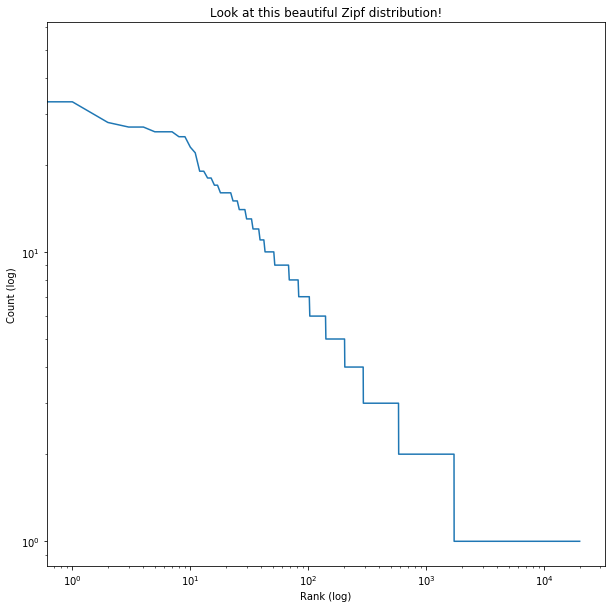

Wall time: 746 ms


In [6]:
%%time
%matplotlib inline

# change the default matplotlib figure size for Jupyter's sake
mpl.rcParams["figure.figsize"] = (10,10)

# Find the n-grams with some manual code
n_grams = [
    "_".join(doc[i:i+NGRAM_N]) 
    for i in range(0, len(doc) - NGRAM_N)
]
n_grams = Counter(n_grams)

# do some prettier formatting than the default printing
print(f"{'NGRAM':<30s}\tCOUNT")
for i in n_grams.most_common(20):
    print(f"{i[0]:<30s}\t{i[1]}")
    
# Now, let's just plot the counts by rank.
counts = sorted(n_grams.values(), reverse=True)
plt.plot(counts)
plt.yscale("log")
plt.xscale("log")
plt.title("Look at this beautiful Zipf distribution!")
plt.xlabel("Rank (log)")
plt.ylabel("Count (log)")
plt.show()

NLTK's ngrams() function will find ngrams for us, like we just did by hand.  It'll be more readable, but function exactly the same, and run almost exactly as far--so in general, this method might be preferable for most people.

NGRAM                         	COUNT
i_saw                         	51
and_i                         	33
i_discovered                  	28
i_perceived                   	27
weed_continent                	27
now_i                         	26
yet_i                         	26
mistress_madison              	26
bo'sun_bade                   	25
then_i                        	25
at_i                          	23
i_found                       	22
i_knew                        	19
second_mate                   	19
bo'sun_'s                     	18
i_heard                       	18
i_went                        	17
and_presently                 	17
i_come                        	16
captain_'s                    	16


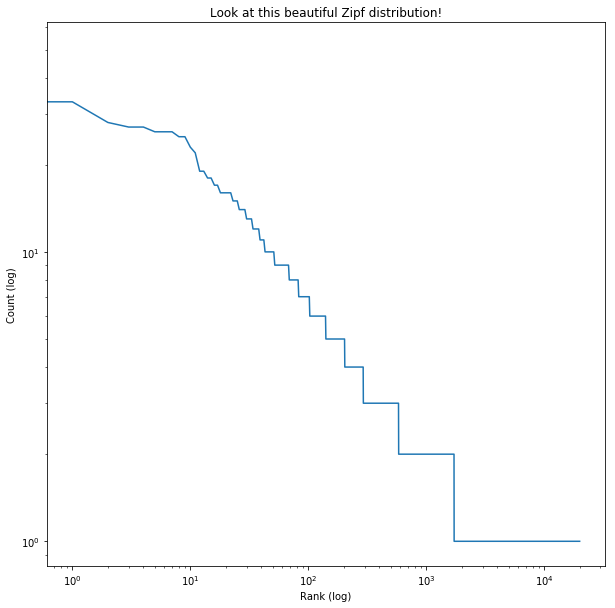

Wall time: 879 ms


In [7]:
%%time
%matplotlib inline

from nltk import ngrams

# change the default matplotlib figure size for Jupyter's sake
mpl.rcParams["figure.figsize"] = (10,10)

# Find n-grams
n_grams = ngrams(doc, NGRAM_N)
n_grams = Counter(n_grams)

# do some prettier formatting than the default printing
print(f"{'NGRAM':<30s}\tCOUNT")
for i in n_grams.most_common(20):
    # okay, so the format string changes a little too
    print(f"{'_'.join(i[0]):<30s}\t{i[1]}")
    
# Now, let's just plot the counts by rank.
counts = sorted(n_grams.values(), reverse=True)
plt.plot(counts)
plt.yscale("log")
plt.xscale("log")
plt.title("Look at this beautiful Zipf distribution!")
plt.xlabel("Rank (log)")
plt.ylabel("Count (log)")
plt.show()

## Phrase-finding/collocation analysis

Ngrams are fun and all, but what if you want to find multi-word phrases that appear more often than they should by random chance alone (i.e., collocates)?  Well, as before, we could hack a bit of code together, or we could use a pre-built tool from the amazing Gensin library: the [Phrasing tools!](https://radimrehurek.com/gensim/models/phrases.html)  These tools let you scan a(n already processed) corpus of texts, and finds bigrams that are collocated more than the raw prior distributions would indicate.  Then, these tools let you transform your original corpus, replacing these bigrams with a single token.  You can repeat this process all you want to find arbitrarily long phrases.

Before doing this, we should run our text through a basic preprocessing pipeline in Gensim.  We'll revisit this in a bit more detail later to talk about what it does; for now, just know that it automates a lot of the basic preprocessing steps for us, like lowercasing, removing stopwords, stemming, etc.

We'll use all the default values for our phrasing models except for the threshold (to guarnatee we find at least _some_ phrases for this demo), but they'll be provided explicitly to show how much customization there is.  Note that the phraser expectes a _list of sentences_, i.e. a _list of lists of words._  We don't strictly need to make them the actual sentences; the only reason Gensim says to use sentences is to avoid collocation across sentence boundaries.

In [8]:
import re

from gensim.models.phrases import Phrases
from gensim.parsing.preprocessing import preprocess_string

doc = open("glen carrig.txt", "r", encoding="utf8").read()
# clean up line breaks and other whitespace issues
doc = re.sub(r"\s+", " ", doc)
doc = preprocess_string(doc)
phrasing = Phrases(
    [doc], # phrases() expects a list of tokenized sentences/documents
    min_count=5,
    threshold=10,
    max_vocab_size=40000000,
    delimiter=b"_", # this has to be a byte string--just a quirk of this model
    progress_per=10000,
    scoring="default",
)

Now, we can look at some of the phrases that our phrase model discovered.  This will print out the phrases in the order they're found in the text, so we might see duplicates.

In [9]:
from pprint import pprint

found_phrases = list(phrasing.export_phrases([doc]))
pprint(found_phrases[:15])

[(b'shook head', 51.86585365853659),
 (b'shook head', 51.86585365853659),
 (b'sun bade', 21.133969389783342),
 (b'sun bade', 21.133969389783342),
 (b'main cabin', 139.67159277504103),
 (b'main cabin', 139.67159277504103),
 (b'captain cabin', 77.1869328493648),
 (b'big cabin', 33.3307210031348),
 (b'aboard hulk', 36.35042735042735),
 (b'main cabin', 139.67159277504103),
 (b'main cabin', 139.67159277504103),
 (b'tot rum', 253.1547619047619),
 (b'captain cabin', 77.1869328493648),
 (b'captain cabin', 77.1869328493648),
 (b'captain cabin', 77.1869328493648)]


And, we can transform our original document(s), replacing all of the discovered bigrams with a single token (e.g., `["the", boat"]` --> `"the_boat"`).  Gensim likes to use the indexing syntax to do transformations--it's a bit weird but you get used to it.

Note that we'll get a warning from Gensim (warnings are not errors--they're more of a "heads up, something looks weird here" sort of notice).  Gensim also has Phraser() objects, which are initialized from a Phrases() object, and are much faster at transforming a corpus.  This only really matters when you're dealing with _massive_ corpora and datasets; for our single book, we don't really need to bother, but I'll show how it would be done anyways.

In [10]:
from gensim.models.phrases import Phraser

# transform the text with the original phrases object...
phrased_doc = phrasing[doc]
print(phrased_doc[500:550])

# ...or by creating a new Phraser() from it first.
phraser = Phraser(phrasing)
phrased_doc = phraser[doc]
print('\n\n', phrased_doc[500:550])

c:\users\andersonh\appdata\local\programs\python\python36\lib\site-packages\gensim\models\phrases.py:486: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['befal', 'georg', 'youngest', 'prentic', 'boi', 'seat', 'pluck', 'sleev', 'inquir', 'troubl', 'voic', 'knowledg', 'cry', 'portend', 'shook_head', 'tell', 'know', 'comfort', 'said', 'wind', 'shook_head', 'plain', 'agenc', 'stark', 'calm', 'scarc', 'end', 'remark', 'sad', 'cry', 'appear', 'come', 'far', 'creek', 'far', 'creek', 'inland', 'land', 'sea', 'fill', 'even', 'air', 'dole', 'wail', 'remark', 'curiou', 'sob', 'human', 'despair', 'cry']


 ['befal', 'georg', 'youngest', 'prentic', 'boi', 'seat', 'pluck', 'sleev', 'inquir', 'troubl', 'voic', 'knowledg', 'cry', 'portend', 'shook_head', 'tell', 'know', 'comfort', 'said', 'wind', 'shook_head', 'plain', 'agenc', 'stark', 'calm', 'scarc', 'end', 'remark', 'sad', 'cry', 'appear', 'come', 'far', 'creek', 'far', 'creek', 'inland', 'land', 'sea', 'fill', 'even', 'air', 'dole', 'wail', 'remark', 'curiou', 'sob', 'human', 'despair', 'cry']


(as you can see, the results of Phrases() and Phraser() are the same--Phraser() will just be _much_ faster, and use much less memory, for very large phrasing passes).

# Some more fun demos: Natural Language Processing 101

Now, let's do some more interesting demos.  These will focus on more sophisticated (but still "entry-level") NLP techniques and tools.

We will:
* Go from raw data to cleaned, workable text.
* Look at some of spaCy and Gensim's text (pre)processing tools
* Do some basic topic modeling with Latent Dirichlet Allocation
* Do some basic classification and regression tasks with some text.

## Getting our data

The previous demos were very simple (even simplistic) and don't really leverage all the cool stuff Python--or programming in general--can do for you.  Let's work with a non-trivial dataset now and do some more NLP-like work.  We'll use the [Blog Authorship Corpus](http://u.cs.biu.ac.il/~koppel/BlogCorpus.htm).  Download it to the same folder as this notebook, then unzip it into a folder names "blogs" (case-sensitive!).

Each author's blog posts are stored as a .xml file, named in the following format: 

`[ID number].[gender].[age].[industry of employment].[astrological sign].xml`

E.g., `11253.male.26.Technology.Aquarius.xml`

And they contain blog data that looks like this:

```<Blog>

<Blog>

<date>20,July,2004</date>
<post>

     
      About to go t bed late (again) got sucked into (another) late night film. Tonight was  urlLink Maybe Baby . It was really good made me think, but not about babies. The guy screws up his marriage and it made me think about making sure, everyday, that mine is tip top. If I'm honest there are areas that we are just getting by in - so I need to resolve to sort them out now before they are a problem. In the film they both keep diaries so I thought I should blog tonight.&nbsp;   Weekend was hectic but great fun. Not that long ago k and I had to work on spending time with other people as a couple. This weekend we never ate alone, except breakfast.&nbsp; K, P and I went for a very breif trip on the river saturday durring a gap in the weather. K stripped off and went for a swim, I love her so much.&nbsp;   Tonight we went out for dinner. It was a lovely evening, the first in weeks, so we ate at the Bridge and sat outside, next to the  urlLink river .     
     
    
</post>
</Blog>```

First thing's first: we need to deal with the XML formatting.  Fortunately, Python has some excellent tools for that, e.g. `xml.etree.ElementTree`.  We'll also want to use a better data structure to represent this text.  There's an absolutely indispensible library called Pandas, which gives you R-style dataframes to work with (and Pandas is probably the single biggest reason that Python has taken over the data science world, demoting R to second-place).

In [11]:
import os

files = [i.path for i in os.scandir("blogs")]
print(files[:5])

['blogs\\1000331.female.37.indUnk.Leo.xml', 'blogs\\1000866.female.17.Student.Libra.xml', 'blogs\\1004904.male.23.Arts.Capricorn.xml', 'blogs\\1005076.female.25.Arts.Cancer.xml', 'blogs\\1005545.male.25.Engineering.Sagittarius.xml']


Let's do a first pass where we just try to parse each file, to make sure there are no problems.  (Data validations is a step you _absolutely do not skip_ if you're doing any real data work, after all!)

In [12]:
from xml.etree import ElementTree

# sorted() just makes sure the files are always in the same order
# for the demos
for i in sorted(files):
    try:
        ElementTree.parse(i)
    except Exception as e:
        print("\nEXCEPTION ON FILE:", i)
        print("EXCEPTION:", e)
        break


EXCEPTION ON FILE: blogs\1000866.female.17.Student.Libra.xml
EXCEPTION: not well-formed (invalid token): line 103, column 225


Uh-oh.  Let's take a look at the file that broke and go see where the problem is.  Fortunately, the error above gave us a line _and_ a column number, so we can go to the exact location where an issue was encountered.

```
<Blog>
[...]

<date>14,January,2003</date>
<post>


      Hehe, just finished dinner! Yum! I'm so happy right now. I don't even know why, I just...am! I'm talking to a bunch of my friends while writing this, which is always fun. Plus I'm doing homework, PLUS I'm watching Law & Order...how massively talented am I? Well, my day was pretty kick butt. Umm, no band OR music theory...very cool, so Kristen and I sat together and did homework and discussed Winter. Next period I hung out with Chris and Kelly for a bit (Alex too for a bit, since he was in Gym) and I left eventually. They started working on music, and...I just always end up feeling left out when they do, so, I try to stay away from those two together in general.Oh well, I went and sat alone in a practice room. Darn...no good stories for the newspaper to write about me. That was a great story, no matter how angry people are about the band comment. I wish people would have read the story actually, instead of reaching paragraph two and deciding it was terrible. Well, anyway, umm...EPVM was interesting. I'm getting nervous about my final. My brother said it was difficult...my brother with the perfect ACT AND SAT scores...arg. I just...wow, I'm so afraid of that test. I'm completely going to fail. Gym...oh jeez...two words  Commando Crawl  OWWWWWWWWWWWWWW  Good lord...that was one of the most painful...oh jeez...just thinking about it. Seriously, if you ever by some chance do that for high ropes...WEAR PANTS! Well, yes...wear pants normally, but don't wear shorts, make sure they are pants, because...it's quite painful if you don't. I made it through though, so it's all good! It just hurt...a lot.   Math, boring, shock shock.  Intervening thought: Why do I always write these while talking to Alex??  Lunch...was interesting. Just hung out with Kelly and Emily some, then Chris and Alex. It was cool...not much to it. Comparative Religion was boring...just, meh, presenting projects...and finally chem...boring, shock shock, and then, I came home, and did stuff, and that is the end of my day...therefore, I shall leave, and go kill alex...I mean...wait...you know NOTHING. You have no evidence...:)

</post>
```

Column numbers aren't displayed in this notebook, but the error is at the ampersand in `Law & Order`.  As it turns out, ampersands are special characters in XML code, and need to be escaped specially (in this case, as `&amp;`).  We could do some manual replacement of characters with the appropriate XML escapes, but that sounds like a lot of work and a lot of room for error.

Fortunately, our document structure is so simple that we can just hack this together with regular expressions.  This will be fast, but **is not** how we should in general deal with problematic XML or other markup files--we'd want to use some of Python's more rudimentary tools, like the base HTML or XML parsers, and overwrite their functionality (e.g. by subclassing).

We'll create a list of dictionaries (think JSONs), which we can easily pass into Pandas to make a big, beautiful, glorious Dataframe object (which we'll save to a .csv so we can re-open it directly later).  We'll work with this Dataframe for most the rest of this demo.

In [13]:
%%time

import os
import re

from tqdm import tqdm_notebook as tqdm
import pandas as pd

# pre-compile patterns we'll use a lot--for speed
date_finder = re.compile(r"^<date>(.*?)</date>$", re.MULTILINE)
post_finder = re.compile(r"^<post>$(.*?)^</post>$", re.MULTILINE|re.DOTALL)
whitespace_cleaner = re.compile(r"\s+", re.MULTILINE)

def process_file(infile):
    # get the user metadata from the filename
    metadata = os.path.split(infile)[-1].split(".")
    text = open(infile, "r", encoding="ISO-8859-1").read()
    
    # Extract date and post content from the file
    dates = date_finder.findall(text)
    posts = post_finder.findall(text)
    
    # assert check will crash our program if it fails--
    # this make sure our approach works.
    assert len(dates) == len(posts)
    blog_data = [
        {
             "Author ID" : metadata[0],
             "Gender"    : metadata[1],
             "Age"       : int(metadata[2]),
             "Industry"  : metadata[3],
             "Sign"      : metadata[4],
             "Date"      : dates[i],
             "Post"      : whitespace_cleaner.sub(" ", posts[i])
        }
        for i in range(len(dates))
    ]
    
    return blog_data

blog_dataframe = pd.concat(
    pd.DataFrame(process_file(i))
    for i in tqdm(files, desc="Generating Dataframe")
)
print("Casting Date column to datetime format.")
print("Saving blog dataframe to Blog Data.csv.")
blog_dataframe.to_csv("corpus data files/Blog Data.csv", index=False)
blog_dataframe

HBox(children=(IntProgress(value=0, description='Generating Dataframe', max=19320), HTML(value='')))


Casting Date column to datetime format.
Saving blog dataframe to Blog Data.csv.
Wall time: 2min 23s


There are a lot of entries in this dataframe.  And the saved CSV is 765MB (!!!) on my machine.

In [14]:
num_words = sum(len(i.split()) for i in blog_dataframe["Post"])
num_authors = blog_dataframe['Author ID'].nunique()
print(f"Number of posts:             {blog_dataframe.shape[0]:,}")
print(f"Number of authors:           {num_authors:,}")
print(f"Approximate number of words: {num_words:,}")

Number of posts:             681,288
Number of authors:           19,320
Approximate number of words: 136,854,709


Now, let's look at some of the ways we can process this text with various libraries.  We'll use the very first blog post as an working example to show what some of these processes do.

In [15]:
demo_post = list(blog_dataframe["Post"])[0]
print(demo_post)

 Well, everyone got up and going this morning. It's still raining, but that's okay with me. Sort of suits my mood. I could easily have stayed home in bed with my book and the cats. This has been a lot of rain though! People have wet basements, there are lakes where there should be golf courses and fields, everything is green, green, green. But, it is supposed to be 26 degrees by Friday, so we'll be dealing with mosquitos next week. I heard Winnipeg described as an "Old Testament" city on urlLink CBC Radio One last week and it sort of rings true. Floods, infestations, etc., etc.. 


## Before we continue: some basic NLP ideas

### The big challenge: Sparsity

NLP is fundamentally a branch of machine learning (ML) that focuses just on language data.  As such, it inherits a lot of ideas and concerns from ML.  One of the biggest ones is _sparsity_.  Sparsity is the phenomenon of having a lot of features with "null" values for a lot of your observations (this usually manifests as "missing data" or "zero").

In language, sparsity is everywhere, since _most utterances don't use most features._  So if we want to categorize any non-trivial corpus of language data, we'll need a _lot_ of features, but most of them won't appear in most of our utterances.

Sparsity is bad.  It makes models have less data to work with for finding patterns, and thus, models will tend to overfit--they'll fit very well to the _current data,_ but will generalize poorly to new data.  Thus, almost all of the work in NLP is actually geared at finding ways to reduce sparsity in language data.

### Data at scale

All of the models of language used in the NLP community are essentially data-driven.  Rules-based models are all but completely dead.

This means that models love data.  More data is better than less, and will make better models, since they're ultimately statistically-based models.

But more data means more computing time.  So, we strive to build models that balance computational efficiency against power and accuracy.  As it turns out, one of the best ways to do this is to get a basic, but working, model of language, and just train it on a massive dataset.  Your results may not be perfectly accurate for every single document, but they should be pretty accurate for the whole dataset, and generally accurate for most documents, if you do it right.

Bear in mind: computational approaches care about balancing precision and recall, but they often come at the expense of the other.

### A good enough model of language\*: Just count the words!
\* _At least, for many basic purposes._

One of the ways to deal with sparsity is to just ignore certain classes of features and focus on a richer subset.  As it turns out, we can do a surprisingly large amount by ignoring every aspect of language except for _what lexical units are used_ and _how often they are used_.  I.e., ignore syntax, ignore pragmatics, ignore even semantics--just count words.

It's a brutally simplistic model of language.  But for many tasks, it works, and it is useful.  Consider: if my task is to find out "what are people talking about," e.g. tracking discussions on Twitter at a large scale, looking at the words used is probably going to be my fastest way to get to that.

Equally important, this is a _computationally_ simple, straightforward, and fast approach.

### Reducing sparsity through preprocessing

One of the most important ways to reduce sparsity is through preprocessing your data. We want to "condense" the data down to a still meaningful representation that irons out all the noise.  E.g., we often want everything to be in the same casee, because computers think that "WORD" (in uppercase) is different from "word", "Word", "WoRd", etc, and does not see any similarities between these tokens unless we explicitly tell it.

When we're doing a word-counting type analysis, remember that we're trying to get at a dense representation of the _content_ of our data.  Some common preprocessing steps to that end are:
* Convert to lowercase
* (Sometimes, but not always) De-accent characters, e.g. convert "â" to "a".
* Tokenize, i.e. split a doucment into a list of tokens (words, punctuation, etc)
* Remove tokens:
  * _Stopwords_ (generally, _function_ words), e.g. "the", "a", "to", etc.
  * Words with very low frequencies (contain very little information, and are not useful)
  * Words with extremely high _document-wise_ frequencies (these don't help us discriminate between documents in our corpus)
* Stem, or lemmatize, the text (not always--depends on the analysis!)
  * Stemming is significantly faster, but lemmatization can be more accurate.
  * But for downstream tasks and analysis, both stemming and lemmatization tend to perform about the same.
* Find multi-word phrases
  * This might add features, but those features may be more meaningful than individual word counts.

In almost all cases, these steps are followed by generating a _vectorized_ representation of the text--e.g. Bag-of-Words, Word2Vec, Doc2Vec, GloVe, etc.  These vector representations can then be used for any quantitative, statistical, or machine learning analyses, e.g. regressions and classifications.

For other analyses (rather than just counting words), we might be interested in preserving more sophisticated, perhaps structural, features of the text:
* Identifying (named) entities
* Identifying noun chunks (more or less NPs/DPs)
* Syntactic parsing (dependency and constituent parsing are most common)
* Part-of-speech tagging

As for the actual analyses we might do, they are many:
* Topic modeling
* Sentiment analysis
* Document scoring/classification (e.g., author identification)

The rest of this notebook is a whirlwind tour through some of these capabilities in Python.

## Preprocessing

We can use the two excellent libraries we've already seen: spaCy and Gensim.

Gensim is a much _faster_ library for preprocessing, since it only operates based on raw string patterns and is designed to be fast and scale to massive datasets.  There is the assumption that any error we induce through the very simplistic approaches will be balanced out by the amount of data we work with--generally a good, and correct, assumption.  Gensim does no syntactic parsing, POS tagging, or other such structure-related analysis, but it's not designed for that.

spaCy is the much _more accurate_ library, since it parses text based on large, powerful pre-trained models (think Stanford's CoreNLP toolkit--it's very much analogous to that).  While still very fast, spaCy is painfully slow compared to Gensim.  But, it has a far more robust tokenizer, it can do part-of-speech tagging, lemmatization, dependency parsing, entity and noun chunk identification, and it even has pre-trained word vectors (and can easily compute vectors for strings of words or entire documents).

### Gensim

Let's first look at Gensim's preprocessing.  There's one function--`gensim.parsing.preprocessing.preprocess_string()`--which encompasses almost all the basic functions we need: lowercasing, de-accenting, tokenizing, stemming (with the Porter stemmer algorithm), stopword removal, removal of numbers, and removal of very short words (which are generally noise to use).

We can also use the Phrases()/Phraser() objects we saw before to find multi-word phrases with ease, though given the size of our demo post, we won't see any show up.  We probably want to do this _after_ we run the main preprocessing.

In [16]:
from gensim.models.phrases import Phrases
from gensim.parsing.preprocessing import preprocess_string

processed = preprocess_string(demo_post)
phrases = Phrases(processed)
processed = list(phrases[processed])

print("Original post:")
print(demo_post)

print("\nAfter Gensim preprocessing:")
print(" ".join(processed))

c:\users\andersonh\appdata\local\programs\python\python36\lib\site-packages\gensim\models\phrases.py:486: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Original post:
 Well, everyone got up and going this morning. It's still raining, but that's okay with me. Sort of suits my mood. I could easily have stayed home in bed with my book and the cats. This has been a lot of rain though! People have wet basements, there are lakes where there should be golf courses and fields, everything is green, green, green. But, it is supposed to be 26 degrees by Friday, so we'll be dealing with mosquitos next week. I heard Winnipeg described as an "Old Testament" city on urlLink CBC Radio One last week and it sort of rings true. Floods, infestations, etc., etc.. 

After Gensim preprocessing:
got go morn rain okai sort suit mood easili stai home bed book cat lot rain peopl wet basement lake golf cours field green green green suppos degre fridai deal mosquito week heard winnipeg describ old testament citi urllink cbc radio week sort ring true flood infest


Notice how the Porter Stemmer finds the uninflected forms of words.  It bases its processing _purely_ on the _letters of a word_.  This makes it fast, but it doesn't always give real words or the most correct forms, e.g. `"morning"` --> `"morn"`, and `"okay"` --> `"okai"`.  But, for most text mining or NLP tasks, this is actually not that big of an issue.  This only _really_ matters, in any practical sense, for human interpretation--which, admittedly, is a non-trivial concern.

### spaCy

spaCy requires us to load models in, as we saw earlier when doing stem-based concordancing.  As before, we'll use their small English model, but we would just change the model name in `spacy.load()` if we wanted a different model. The small model will generally be a bit faster, which is all we need for this demo's purposes.

As before, applying the spaCy pipeline is easy, though we do need to manually filter our stopwords and punctuation with some explicit checks.  And as with the Gensim examples, we'll run the Phrases() model on our post, though as before we won't see any changes.

In [17]:
%%time

from gensim.models.phrases import Phrases
import spacy

nlp = spacy.load("en_core_web_sm")
processed = [
    i.lemma_
    for i in nlp(demo_post)
    if i.is_stop == False
    and i.is_punct == False
]
phrases = Phrases(processed)
processed = list(phrases[processed])

print("Original post:")
print(demo_post)

print("\nAfter spaCy preprocessing:")
print(" ".join(processed))

c:\users\andersonh\appdata\local\programs\python\python36\lib\site-packages\gensim\models\phrases.py:486: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


Original post:
 Well, everyone got up and going this morning. It's still raining, but that's okay with me. Sort of suits my mood. I could easily have stayed home in bed with my book and the cats. This has been a lot of rain though! People have wet basements, there are lakes where there should be golf courses and fields, everything is green, green, green. But, it is supposed to be 26 degrees by Friday, so we'll be dealing with mosquitos next week. I heard Winnipeg described as an "Old Testament" city on urlLink CBC Radio One last week and it sort of rings true. Floods, infestations, etc., etc.. 

After spaCy preprocessing:
  well get go morning -PRON- be rain be okay sort suit mood -PRON- easily stay home bed book cat this lot rain people wet basement lake golf course field green green green but suppose 26 degree friday will deal mosquito week -PRON- hear winnipeg describe old testament city urllink cbc radio one week sort ring true flood infestation etc etc
Wall time: 766 ms


Notice how the processed text is much more _human-readable_ with this approach (this is due to the use of a lemmatizer, rather than a stemmer).  While nice for reporting and inspecting results, the extra overhead in runtime (not evident in this small example) might make this an unreasonable proposition for large datasets if time is an issue.  And, as mentioned earlier, if you're doing an _automated analysis_ of your text later, there isn't always a big difference, if any, in how well stemming versus lemmatization performs.

## Linguistic Analysis with spaCy

spaCy's language models have a LOT of functionality.  Let's look at just some of the most easily accessible ones.

First, we've already seen spaCy's ability to do lemmatization, stopword tagging, and punctuation tagging.

In [18]:
import spacy

nlp = spacy.load("en_core_web_sm")

print(f"{'Token':<15s}\t{'Lemma':<15s}\t{'Is stopword?':<15s}\t Is punctuation?")
for i in nlp(demo_post)[:15]:
    token = i.text
    lemma = i.lemma_
    is_stop = str(i.is_stop)
    is_punct = str(i.is_punct)
    print(f"{token:<15s}\t{lemma:<15s}\t{is_stop:<15s}\t{is_punct}")

Token          	Lemma          	Is stopword?   	 Is punctuation?
               	               	False          	False
Well           	well           	False          	False
,              	,              	False          	True
everyone       	everyone       	True           	False
got            	get            	False          	False
up             	up             	True           	False
and            	and            	True           	False
going          	go             	False          	False
this           	this           	True           	False
morning        	morning        	False          	False
.              	.              	False          	True
It             	-PRON-         	False          	False
's             	be             	False          	False
still          	still          	True           	False
raining        	rain           	False          	False


And, we can also do part-of-speech tagging.

In [19]:
print(f"{'TOKEN':<15s}\t{'COARSE POS':<17s}\t{'FINE POS'}")
for i in nlp(demo_post)[:15]:
    token = i.text
    coarse = i.pos_
    fine = i.tag_
    print(f"{token:<15s}\t{coarse:<17s}\t{fine}")

TOKEN          	COARSE POS       	FINE POS
               	SPACE            	
Well           	INTJ             	UH
,              	PUNCT            	,
everyone       	NOUN             	NN
got            	VERB             	VBD
up             	PART             	RP
and            	CCONJ            	CC
going          	VERB             	VBG
this           	DET              	DT
morning        	NOUN             	NN
.              	PUNCT            	.
It             	PRON             	PRP
's             	VERB             	VBZ
still          	ADV              	RB
raining        	VERB             	VBG


Entity recognition...

In [20]:
from pprint import pprint
ents = nlp(demo_post).ents
pprint(list(ents))

[this morning,
 26 degrees,
 Friday,
 next week,
 Winnipeg,
 an "Old Testament",
 CBC Radio,
 One last week,
 Floods]


Noun chunk identification...

In [21]:
from pprint import pprint
noun_chunks = nlp(demo_post).noun_chunks
pprint(list(noun_chunks))

[everyone,
 It,
 me,
 Sort of suits,
 my mood,
 I,
 bed,
 my book,
 the cats,
 a lot,
 rain,
 People,
 wet basements,
 lakes,
 golf courses,
 fields,
 everything,
 it,
 26 degrees,
 Friday,
 we,
 mosquitos,
 I,
 Winnipeg,
 an "Old Testament" city,
 it,
 Floods,
 infestations]


And, as we might suspect from the above information, spaCy also does dependency parsing.

In [22]:
print(f"{'TOKEN':<15s}\t{'HEAD':<15s}\t{'DEPENDENCY RELATION':<20s}\t{'CHILDREN'}")
for i in nlp(demo_post)[:25]:
    token = i.text
    head = i.head.text
    dep = i.dep_
    children = ", ".join(c.text for c in i.children if not c.is_punct)
    print(f"{token:<15s}\t{head:<15s}\t{dep:<20s}\t{children}")

TOKEN          	HEAD           	DEPENDENCY RELATION 	CHILDREN
               	Well           	                    	
Well           	got            	intj                	 
,              	got            	punct               	
everyone       	got            	nsubj               	
got            	got            	ROOT                	Well, everyone, up, and, going
up             	got            	prt                 	
and            	got            	cc                  	
going          	got            	conj                	morning
this           	morning        	det                 	
morning        	going          	npadvmod            	this
.              	got            	punct               	
It             	raining        	nsubj               	
's             	raining        	aux                 	
still          	raining        	advmod              	
raining        	raining        	ROOT                	It, 's, still, but, 's
,              	raining        	punct               	
but       

We can use the built-in disiplaCy tool to generate a visualization of the dependency parse (though only of the first sentence, for space's sake):

In [23]:
from spacy import displacy
displacy.render(
    nlp("Well, everyone got up and going this morning."), 
    style="dep",
    jupyter=True # to make this render correctly in the Jupyter notebook
)

There's more that spaCy can do, and there are other models and libraries available for doing this sort of automated parsing and annotation of text (e.g., there are interfaces to Stanford's CoreNLP suite), but spaCy is always a good bet since it's fast (for the amount of work it does), pretty accurate, easy to use, and flexible.

## Topic Modeling

Topic Modeling refers to a wide variety of algorithms that are used to explore and discover "topics" within a corpus.  "Topic" is being used with a very specific meaning here--a topic is a _statistical distribution of words_.  You might already be familiar with Latent Semantic Analysis (LSA; sometimes called Latent Semantic Indexing, or LSI), which is an older model for this sort of analysis.

Most modern algorithms are based on [Latent Dirichlet Allocation (LDA)](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf), which uses word co-occurrences within documents to determine the topics.  LDA has given rise to a number of subsequent topic models: 
* Author-Topic models, which are LDA with metadata (usually, but not always, the author of a piece)
* Dynamic topic models, which include time metadata in the modeling process
* Hierarchical Dirichlet Process, an extension of LDA that is _nonparametric_ with regards to the number of topics (but can give less clear results in some cases).

All of these models are implemented in Genim.  Due to the size of our corpus and the fact that this is a live demo, we'll use Gensim's speedier preprocessing tools to work with our data and prepate it for topic modeling.  And we'll only show LDA, since the others do the same basic thing and look basically the same in code.

Gensim requires that the corpus be in a _bag of words_ format for topic modeling, so we'll need to put our documents in that format first.  Fortunately this requires little code: just do our preprocessing, then use some pre-built tools from Gensim to do the rest.

In [24]:
%%time

from gensim.corpora import Dictionary
from gensim.corpora.mmcorpus import MmCorpus
from gensim.models.phrases import Phrases, Phraser
from gensim.parsing.preprocessing import preprocess_string
from tqdm import tqdm_notebook as tqdm

# preprocess our corpus
corpus = [
    preprocess_string(i) 
    for i in tqdm(blog_dataframe["Post"], desc="Preprocessing")
]
phrases = Phraser(Phrases(tqdm(corpus, desc="Phrase-finding"), min_count=100))
corpus = list(phrases[tqdm(corpus, desc="Phrasing")])
id2word = Dictionary(tqdm(corpus, desc="id2word"))
# remove tokens with extremely high or low frequencies
vocabsize = len(id2word)
id2word.filter_extremes(
    no_above=.5,  # remove tokens in > 50% of the documents (default)
    no_below=5,   # remove tokens in < 5 documents (default)
    keep_n=500000 # only keep 500k tokens, max--up from default 100k for good measure
)
# Reset index spacings for better efficiency
id2word.compactify()
print(f"Removed {vocabsize - len(id2word)} tokens based on frequency criteria.")
corpus = [
    id2word.doc2bow(i) 
    for i in tqdm(corpus, desc="BoW")
]

HBox(children=(IntProgress(value=0, description='Preprocessing', max=681288), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Phrase-finding', max=681288), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Phrasing', max=681288), HTML(value='')))

HBox(children=(IntProgress(value=0, description='id2word', max=681288), HTML(value='')))


Removed 507524 tokens based on frequency criteria.


HBox(children=(IntProgress(value=0, description='BoW', max=681288), HTML(value='')))


Wall time: 23min 52s


Around this time we should also notice that we're using a _huge_ amount of RAM.  So much, in fact, that the computer might be close to running out.  (It turns out that it's almost entirely from the dataframe still in memory, but let's just pretend for the moment that it's our actual corpus).  How do we deal with this?  Simple: _streaming._  Gensim is built around the concept of working with data one chunk at a time--so we can save our data to a file, then read one "chunk" of that file at a time!  When dealing with a few hundred, or a few thousand, documents this isn't needed.  But when dealing with _millions_ of documents or more, it's absolutely required, unless you want to spend thousands of dollars on extremely high-end computing hardware or cloud computing time/space.

Our corpus doesn't actually require this.  (The cell below will show it's only using a few megabytes--perfectly reasonable).  But we'll do it anyways, just for demonstration's sake, since this same idea and approach would scale up nicely.

In [25]:
from sys import getsizeof

# getsizeof returns bytes--convert to megabytes
# nb: factors of 1024, not 1000
id2word_size = getsizeof(id2word) / 1024
corpus_size = getsizeof(corpus) / 1048576
blog_size = getsizeof(blog_dataframe) / 1048576

print(f"id2word dictionary size in memory: {id2word_size:.2f}KB")
print(f"Gensim corpus size in memory: {corpus_size:.2f}MB")
print(f"Blog Dataframe dictionary size in memory: {blog_size:.2f}MB")

# Delete that massive blog dataframe first--we already saved
# it to file.
del blog_dataframe

print("Saving id2word dictionary.")
id2word.save("corpus data files/id2word")
print("Serializing bag-of-words corpus.")
MmCorpus.serialize(
    fname="corpus data files/bow_corpus.mm",
    corpus=corpus,
    id2word=id2word
)
print("Corpus and id2word dict saved.")

# we can reload the id2word and corpus data from the files
# we just saved, too.
del corpus
del id2word

id2word dictionary size in memory: 0.05KB
Gensim corpus size in memory: 5.83MB
Blog Dataframe dictionary size in memory: 969.19MB
Corpus and id2word dict saved.


When re-reload the corpus, we'll see that it's _much_ smaller in memory.  This is because, using Gensim's tools, we're only looking at the size of the _thing that accesses the data,_ but which does not currently store any of the data--it's all in a file on disk.  

Accessing data from disk will be slow, though.  Even the fastest SSDs are still at least 10x slower than even slow RAM.  So our runtime will be limited by _disk access speed_.  BUT, disk space is _significantly_ cheaper than RAM space!  At the time of writing, 16 gigabytes of RAM costs about \$200*.  Meanwhile, $200 can get you between 7 and 10 _terabytes_ of hard drive space (less if you want SSDs, though).  So while reading corpora off disk is very slow, it lets us work with _much_ larger datasets.

We can re-load the corpus and dictionary we just saved.  The dictionary didn't take up much memory at all, but saving a copy was a good idea anyways.  The corpus also didn't take much space.

\*_RAM prices are currently (as of early 2018) very highly inflated, though; normally this much RAM should only cost about $100.  But the point still stands: RAM is expensive, hard drives are dirt cheap._

In [26]:
print("Loading id2word dictionary.")
id2word = Dictionary.load("corpus data files/id2word")
print("Loading bag-of-words corpus.")
corpus = MmCorpus("corpus data files/bow_corpus.mm")

### Aside: spaCy bag-of-words pipeline

We won't run this during this demo, but just for comparison, here's a spaCy preprocessing pipeline that does the same thing.  The only thing that changes is the first pass through the corpus (the first `corpus = [...]` bit)--the bag-of-words steps are as before.  The change is shown below--all the other code would be the same.

```
import spacy

nlp = spacy.load("en_core_web_sm", disable=["parser", "tagger", "ner"])
corpus = [
    [
        i.lemma_
        for i in nlp(j)
        if i.is_stop == False
        and i.is_punct == False
    ]
    for j in tqdm(texts, desc="Preprocessing")
]
```

When I ran this on my computer, it took about an hour and a half to run (~200 documents per second), compared to the Gensim pipeline which took about 11 minutes (~1000 documents per second).  Of course, if you remove the `disable` line, you'll get much higher-quality results, but it will run about 10x slower (~20 documents per second on my computer, nearly 12 hours total runtime).

### Back to topic models

Now, let's run some of these topic models.  We won't bother tweaking any of the default settings (except for chunksize, which should give us a bit more speed), meaning each one will search for 100 topics.  This is the most important parameter in the models, by far--and sadly, the only really good way to find a good value is to run it at a range of different topic numbers and see what gives you useful results.  You _can_ look at the _coherence_ of each topic (calculated by Gensum automatically) and use that to evaluate your model, but the be-all-end-all is the human interpretability and the usefulness of your topics.

These models will take a while.  So we can skip down to the next cell and just load the models back up from disk.

We also need to do a _[term frequency-inverse document frequency](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)_ transform on the corpus.  This is a weighting scheme that converts the raw word counts into values that _decrease_ the weight of a word based on how many documents it appears in (more documents --> proves less informatio about any individual document, so decrease the weight), and _increases_ it based on how often it appears _within the current document_ (more occurrences --> more important to the document).

In [ ]:
from gensim.corpora import Dictionary
from gensim.corpora.mmcorpus import MmCorpus
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.atmodel import AuthorTopicModel
from gensim.models.hdpmodel import HdpModel
from gensim.models.tfidfmodel import TfidfModel

id2word = Dictionary.load("corpus data files/id2word")
corpus = MmCorpus("corpus data files/bow_corpus.mm")
tfidf_model = TfidfModel(tqdm(corpus, desc="TFIDF Fitting"))
# TfidfModel returns a generator.  We want it as a list to 
# re-use it for all the models.
corpus = list(tfidf_model[tqdm(corpus, desc="TFIDF Transforming")])
print("Serializing tf-idf corpus.")
MmCorpus.serialize(
    fname="corpus data files/tfidf_corpus.mm",
    corpus=corpus,
    id2word=id2word
)

HBox(children=(IntProgress(value=0, description='TFIDF Fitting', max=681288), HTML(value='')))

HBox(children=(IntProgress(value=0, description='TFIDF Transforming', max=681288), HTML(value='')))

Gensim has a multi-threaded LDA implementation that can take advantage of multi-core processors for significant speedups; we'll use that.

In [ ]:
%%time

print("Running LDA model.")
lda = LdaMulticore(corpus, workers=3, id2word=id2word, chunksize=50000)
print("Saving LDA model to file.")
lda.save("topic models/LDA.model")
print("Done.")

Running LDA model.


Let's look at some of the LDA outputs and see if we can interpret them.  We'll look at only the top ten highest-likelihood topics, sorted by decreasing likelihood.

In [ ]:
from pprint import pprint
lda = LdaMulticore.load("topic models/LDA.model")
pprint(lda.top_topics(corpus, topn=10)[:10])

# delete the model to conserve RAM space.
# We've already saved it to disk, so it can be reloaded.
del lda

## Word Embeddings

Word embeddings have absolutely taken over the entire field of NLP, starting with Mikolov et al's 2013 paper on [Word2Vec](https://arxiv.org/abs/1301.3781).  The basic idea of these embeddings:
* Some notion of "meaning" is recoverable from the _contexts_ that a word occurs in
* It is possible to generate a _vector_ representation of a word such that _words appearing in similar contexts have similar vectors_ (or, more intuitively, "are close to each other").

Word vectors are used for almost every kind of task: document scoring and classification, sentiment analysis, document and word clustering, machine translation (though less commmonly), and more.  Plus, they've been demonstrated to excel at a number of lexical similarity and analogy tasks.

Gensim has an impelementation of Word2Vec that we can use on our corpus.  spaCy, meanwhile, comes pre-bundled with word vectors computed using Stanford's GloVe algorithm (which works differently under the hood, but in terms of how well the vectors actually perform in any application, is basically identical).

### Brief aside: Poincare Embeddings
In May 2017, Maximilian Nickel and Douwe Kiela published [an extremely exciting paper](https://arxiv.org/pdf/1705.08039) on embeddings performed in _hyperbolic space_ rather than _Euclidean space_ (all prior models were in Euclidean space).  These embeddings--while not yet well-suited to extracting word similarities and meanings from large bodies of unlabeled text--show an extreme aptitude for embedding _graph_- and _network_-like data, e.g. WordNet, and can capture various relations like hypernymy/hyponymy and synonymy quite well.  Keep an eye on "Poincare Embeddings"--lots of interesting things are sure to happen there soon.

### spaCy word vectors
We'll work with spaCy's pre-trained vectors just for time's sake--training word2vec models in Gensim is surprisingly fast, but we'll be doing basically the same thing downstream.  First, as always, we need to load our data and our model.  We'll just use a single blog post, and we'll turn off a bunch of the spaCy parsing stuff for speed.

In [ ]:
import pandas as pd
import spacy

nlp = spacy.load("en_core_web_lg")

# just use the very first post for demos
demo_post = pd.read_csv(
    "corpus data files/Blog Data.csv",
    usecols=["Post"],
    nrows=1,
    squeeze=True
)[0]
demo_post = nlp(demo_post)

In [ ]:
print(demo_post[1])
print(demo_post[1].vector)

In [ ]:
print(f"{'Token':<15s}\tSimilarity to '{demo_post[1].text}'")

for i in demo_post[:15]:
    # try/except because some token comparisons throw errors on spaCy's end
    try:
        print(f"{i.text:<15s}\t{demo_post[1].similarity(i):.3f}")
    except:
        pass

Word vectors can also be extended to computer vectors for entire documents.  Usually, this is done by simply adding or averaging the vectors for each individual word in the document.  (Incidentally, this exact same approach lets you get a vector for any arbitrary bit of text!)

In [ ]:
print(demo_post.vector)

In [ ]:
print(f"{'Token':<15s}\tSimilarity to whole document")
for i in demo_post[:15]:
    print(f"{i.text:<15s}\t{demo_post.similarity(i):<.3f}")

## Classification and Regression with Text
Since we have vectors representing documents (we can also use the bag-of-words representation for this, too!), we can do any classical statistical test or modelling we want, like trying to build a model to predict the age of a post's author from its contents, or predicting their gender.  But we won't use statistics, because we have tools better suited to the specifics of the tasks at hand: machine learning.

Without getting too deep in the weeds, machine learning models are essentially extensions of statistics that are based on _computational mathematics_ rather than _classical mathematics_.  They tend to scale better to massive datasets (i.e. run faster and predict better) and are often more powerful for pure prediction, but they are designed for larger datasets and may not work well at lower sizes.

However, ultimately, the distinction between "machine learning" and "statistics" is a false one.  The real difference is "experimentalists" (who seek to understand _causation_) and "data miners," who only want to build models with good _predictive power_.  (I won't get any further into this--but Leo Breiman's 2001 paper [Statistical Modeling: The Two Cultures](https://projecteuclid.org/euclid.ss/1009213726) is an interesting exploration of this divide).

Python has some absoltuely top-tier machine learning libraries: Scikit-Learn for non-neural models (e.g. decision trees, random forests, support vector machines), and various environments like Keras, Tensorflow, and Pytorch for building neural networks.  We'll use non-neural models for this demo--they both run faster (as in, by a factor of days, sometimes) and are _much_ easier to interpret.

We'll build four models, using two different sets of target variables and two different sets of predictors.

Targets: 
* Author age (regression)
* Author gender (binary classification)
* Author industry, where provided (multi-class classification)

Predictors:
* Document vectors, generated by spaCy
* Bag-of-Words model, _without_ tf-idf weighting (it ends up being only marginally helpful for the model performance of SVMs, but detrimental to the model interpretability)

We'll just one type of model--Support Vector Machines--for both regression and classification.  SVMs strike a nice balance between speed (though there are faster models) and performance (though there are more powerful models), and are always a good go-to.  For binary classification tasks, they're still among the best models around.  Specifically, we'll use SVMs with a _linear kernel_--don't worry for now about the impelementation details of that, just know that a linear kernel SVM runs faster than other kinds, and is often plenty good for most tasks.

(Spoilers: our predictions will be kinda crap)

In [ ]:
# we need a lot more imports for this than before
from gensim.corpora import Dictionary
from gensim.corpora.mmcorpus import MmCorpus
from gensim.matutils import corpus2csc
from gensim.models.tfidfmodel import TfidfModel
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from scipy.sparse import csr_matrix
import spacy
from tqdm import tqdm_notebook as tqdm

from pprint import pprint

In [ ]:
print("Reading in target variables.")
targets = pd.read_csv(
    "corpus data files/Blog Data.csv",
    usecols=["Age", "Gender", "Industry"],
    squeeze=True
)
ages = targets["Age"].values
genders = targets["Gender"].values
industries = targets["Industry"].values

In [ ]:
from collections import Counter
# Look for bad values we might need to remove;
# the Counter() will tell us how many of each
# value we have in our dataset.
pprint(Counter(ages))
pprint(Counter(genders))
pprint(Counter(industries))

We'll want to remove the `'indUnk'` industry entries, since these are basically just missing data for us, they consist of a large portion of our total dataset, and we cannot reasonably impute any values.  We'll do this later, when we get to the actual model-building stage.

In [ ]:
%%time

print("Loading spaCy model.")
# Only large model has pre-trained word vectors.
# Disable the parser, tagger, and named entity recognizer
# for extra speed in this step.
nlp = spacy.load("en_core_web_lg", disable=["parser", "tagger", "ner"])
print("Loading blog posts.")
vector_corpus = list(pd.read_csv(
    "corpus data files/Blog Data.csv",
    usecols=["Post"],
    squeeze=True
))
print("Retrieving vectors.")
vector_corpus = np.array([
    nlp(i).vector
    for i in tqdm(vector_corpus, desc="spaCy vectors")
])
print(vector_corpus)
print(vector_corpus.shape)
# Cast to a 16-bit floating point format (smaller memory/on-disk size)
# and save.  This means we don't have to re-run the above time-
# consuming steps every time we want to do some work with this
# matrix.
np.save(
    "corpus data files/GloVe matrix.npy", 
    vector_corpus.astype(np.float32)
)

And now we re-load our bag-of-words corpus off disk.  Note that we could do tf-idf scaling here, and it might help results a bit, and it would probably help our performance a bit, but we won't--it will make interpreting our model considerably more difficult.  Instead, we'll just apply a standard scaling on the sparse matrix, scaling every feature such that the maximum absolute value is 1.  (we won't center it to zero mean and unit variance--that would destroy the sparsity and we couldn't load the matrix into memory)

In [ ]:
%%time

print("Loading bag-of-words (non tf-idf) corpus.")
corpus = list(MmCorpus("corpus data files/bow_corpus.mm"))
corpus = corpus2csc(corpus).transpose().tocsr()
print("Scaling bag-of-words features.")
corpus = MaxAbsScaler().fit_transform(corpus)

Now let's do the actual modeling.  We'll use Support Vector Machines for classification and regression; these are pretty powerful models and generally pretty good choices.  Others, which we won't use here because they take longer to run, include Random Forests, Adaboost, Stochastic Gradient Descent (which is fast, but has a _lot_ of parameters to tune), and neural networks.

We will:

* Use a grid search to exhaustively search for good parameters (within a pre-defined search space).  This is called _(hyper)parameter optimization._
* Use 3-fold cross-validation to assess model performance for each parameter combination we try.
  * Data is split into 3 equally sized "folds."  (usually, 5 or 10 folds would be used, but for time's sake, 3 will suffice here).
  * Four folds are used to train the model; the fifth is used to assess its performance.
  * All permutations of "train-on-2, test-on-1" are performed, and scores are averaged to get the overall model performance.
* Print out the best model parameters and the best score for each task.
* Open up one of the models and look inside it.

In [ ]:
# For remove "indUnk" industries later
tmp = industries != ["indUnk"]

# Load our vector corpus from file and normalize
# each observation (not feature) to have magnitude 1
print("Loading and GloVe corpus.")
vector_corpus = np.load("corpus data files/GloVe matrix.npy")
vector_corpus = Normalizer().fit_transform(vector_corpus)
print("Done.")

# We also need to scale the bag of words corpus such that each feature
# is in the range [0, 1]--SVMs are sensitive to feature scaling.
# print("Scaling CSR corpus.")
# corpus = MaxAbsScaler().fit_transform(corpus)

# Create the scikit-learn optimizers that will do cross-validaton
# scoring and tune our model parameters
svr_optimizer = GridSearchCV(
    estimator=LinearSVR(),
    param_grid={
        "C":np.logspace(-5, 1, 7),
    },
    n_jobs=3,
    verbose=3,
    cv=3,
    error_score=0,
)

svc_optimizer = GridSearchCV(
    estimator=LinearSVC(),
    param_grid={
        "C":np.logspace(-5, 1, 7)
    },
    n_jobs=3,
    verbose=3,
    cv=3,
    error_score=0,
)

Now, let's optimize some models!

In [ ]:
%%time

# print("Beginning CSR-Age regression fit.")
# best_age_bow = svr_optimizer.fit(
#     corpus,
#     ages
# )

print("Beginning GloVe-Age regression fit.")
best_age_glove = svr_optimizer.fit(
    vector_corpus,
    ages
)

# print("Beginning CSR-Astrological Sign classification fit.")
# best_sign_bow = svc_optimizer.fit(
#     corpus,
#     genders
# )

# print("Beginning GloVe-Astrological Sign classification fit.")
# best_sign_glove = svc_optimizer.fit(
#     vector_corpus,
#     genders
# )

# print("Beginning CSR-Industry classification fit.")
# best_industry_bow = svc_optimizer.fit(
#     corpus[tmp],
#     industries[tmp]
# )

# print("Beginning GloVe-Industry Sign classification fit.")
# best_industry_glove = svc_optimizer.fit(
#     vector_corpus[tmp],
#     industries[tmp]
# )

In [ ]:
print("CSR-Age model:")
print(f"Best R^2 score:  {best_age_bow.best_score_}")
print(f"Best parameters: {best_age_bow.best_params_}")

print("\nGloVe-Age model:")
print(f"Best R^2 score:  {best_age_glove.best_score_}")
print(f"Best parameters: {best_age_glove.best_params_}")

print("\nCSR-Gender model:")
print(f"Best F1 score:   {best_sign_bow.best_score_}")
print(f"Best parameters: {best_sign_bow.best_params_}")

print("\nGloVe-Gender model:")
print(f"Best F1 score:   {best_sign_glove.best_score_}")
print(f"Best parameters: {best_sign_glove.best_params_}")

print("\nCSR-Industry model:")
print(f"Best F1 score:   {best_industry_bow.best_score_}")
print(f"Best parameters: {best_industry_bow.best_params_}")

print("\nGloVe-Industry model:")
print(f"Best F1 score:   {best_industry_glove.best_score_}")
print(f"Best parameters: {best_industry_glove.best_params_}")

We won't open up the model here, since we wouldn't have too much that we could meaningfully interpret.  In general, SVMs will read like any linear model: a series of coefficient weights and an intercept define a linear combination of features that are used for classification or regression, with higher magnitude coefficients being more important to the model.

However, with our particular task, we'd have to go through a lot of extra legwork to interpret what the features themselves mean.  With GloVe vectors, each dimension is completely arbitrary and meaningless.  With a raw word count matrix, we could more easily read off the importances of each feature, but when applying tf-idf weighting, we hurt the interpretability since we've transformed the feature weights considerably.